# Univariant Analysis

Wine Review Data: https://www.kaggle.com/zynicide/wine-reviews

In [2]:
import pandas as pd
%matplotlib inline
reviews = pd.read_csv("/content/drive/My Drive/Machine-Learning/First offering/modules/3. EDA and Visualization/1. Visualization/Visualization Wine/winemag-data_first150k.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


## Bar Chart

### Question 
#### how to get the top 10 frequencies of the province in the data?

In [0]:
# how to get the top 10 frequencies of the province in the data

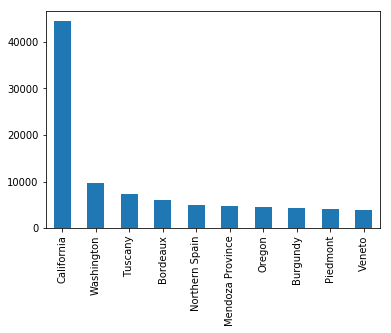

In [4]:
reviews['province'].value_counts().head(10).plot.bar()

What does this plot tell us? 
It says California produces far more wine than any other province of the world! We might ask what percent of the total is Californian vintage? This bar chart tells us absolute numbers, but it's more useful to know relative proportions.

## Line Chart

#### When we have many categories to fill in and then bar chart/ Column chart will not make much sense, so we can proceed with the line chart.

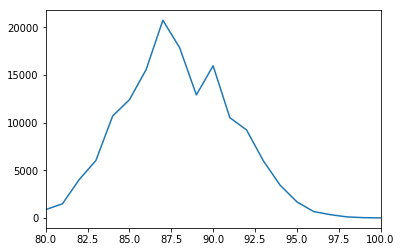

In [5]:
reviews['points'].value_counts().sort_index().plot.line()

A line chart can pass over any number of many individual values, making it the tool of first choice for distributions with many unique values or categories.

However, line charts have an important weakness: unlike bar charts, they're not appropriate for nominal categorical data. While bar charts distinguish between every "type" of point line charts mushes them together. So a line chart asserts an order to the values on the horizontal axis, and the order won’t make sense with some data. After all, a "descent" from California to Washington to Tuscany doesn't mean much!

Line charts also make it harder to distinguish between individual values.

In general, if your data can fit into a bar chart, just use a bar chart!

## Area Chart

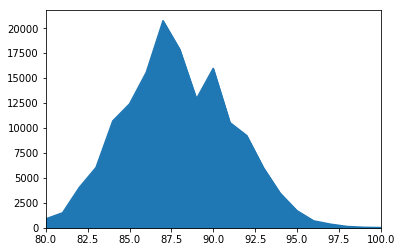

In [6]:
reviews['points'].value_counts().sort_index().plot.area()

When plotting only one variable, the difference between an area chart and a line chart is mostly visual. In this context, they can be used interchangably.

## Histogram 

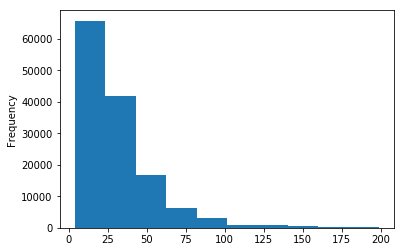

In [7]:
reviews[reviews['price'] < 200]['price'].plot.hist()

In a histogram, it is the area of the bar that indicates the frequency of occurrences for each bin. This means that the height of the bar does not necessarily indicate how many occurrences of scores there were within each individual bin. It is the product of height multiplied by the width of the bin that indicates the frequency of occurrences within that bin.

TypeError: ignored

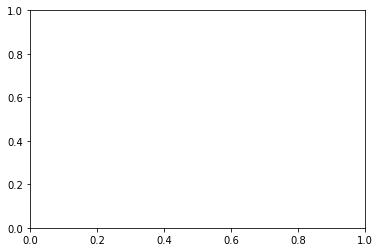

In [18]:
import matplotlib.pyplot as plt
plt.boxplot(reviews.province, reviews.province.count)

# BiVariant Analysis

## Scatter Plot

#### When you want to find the relationship between the variables then we use the following plots:

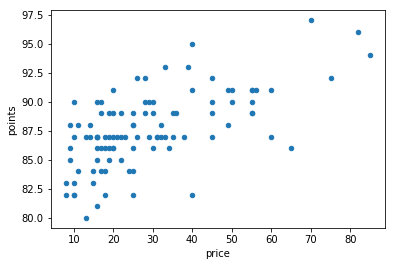

In [8]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

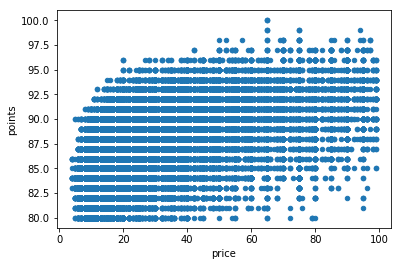

In [9]:
reviews[reviews['price'] < 100].plot.scatter(x='price', y='points')

Because of their weakness to overplotting, scatter plots work best with relatively small datasets, and with variables which have a large number of unique values.

## Hex plot

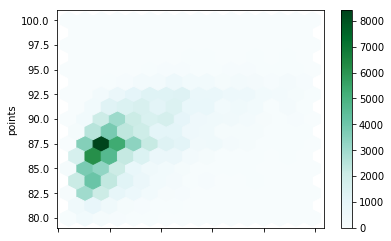

In [10]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

The data in this plot is directly comparable with that in the scatter plot from earlier, but the story it tells us is very different. From this hexplot we can see that the bottles of wine reviewed by Wine Magazine cluster around 87.5 points and around $20.

We did not see this effect by looking at the scatter plot, because too many similarly-priced, similarly-scoring wines were overplotted. By doing away with this problem, this hexplot presents us a much more useful view of the dataset.

Hexplots and scatter plots can by applied to combinations of interval variables and/or ordinal categorical variables.

In [11]:
wine_counts = pd.read_csv("/content/drive/My Drive/Machine-Learning/First offering/modules/3. EDA and Visualization/1. Visualization/Visualization Wine/top-five-wine-score-counts.csv", index_col=0)
wine_counts.head()

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0
83,95.0,570.0,669.0,346.0,364.0
84,268.0,923.0,1146.0,733.0,602.0


### What if you want to check the composition of variables at a particular instance or value

## Stacked Plot

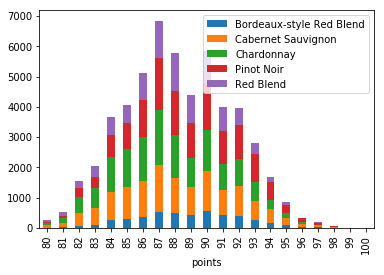

In [12]:
wine_counts.plot.bar(stacked=True)

Stacked bar plots share the strengths and weaknesses of univariate bar charts. They work best for nominal categorical or small ordinal categorical variables.

Another simple example is the area plot, which lends itself very naturally to this form of manipulation:

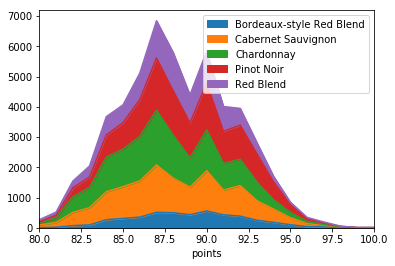

In [13]:
wine_counts.plot.area()

Like single-variable area charts, multivariate area charts are meant for nominal categorical or interval variables.

Stacked plots are visually very pretty. However, they have two major limitations.

The first limitation is that the second variable in a stacked plot must be a variable with a very limited number of possible values (probably an ordinal categorical, as here). Five different types of wine is a good number because it keeps the result interpretable; eight is sometimes mentioned as a suggested upper bound. Many dataset fields will not fit this critereon naturally, so you have to "make do", as here, by selecting a group of interest.

The second limitation is one of interpretability. As easy as they are to make, and as pretty as they look, stacked plots make it really hard to distinguish concrete values. For example, looking at the plots above, can you tell which wine got a score of 87 more often: Red Blends (in purple), Pinot Noir (in red), or Chardonnay (in green)? It's actually really hard to tell!

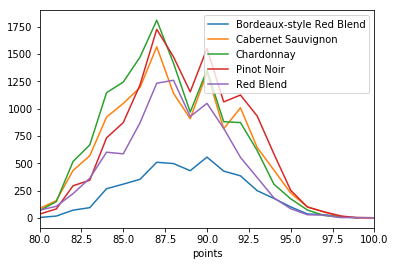

In [14]:
wine_counts.plot.line()

Using a line chart this way makes inroads against the second limitation of stacked plotting: interpretability. Bivariate line charts are much more interpretable because the lines themselves don't take up much space. Their values remain readable when we place multiple lines side-by-side, as here.

For example, in this chart we can easily answer our question from the previous example: which wine most commonly scores an 87. We can see here that the Chardonnay, in green, narrowly beats out the Pinot Noir, in red.